In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Import Dependencies
# Loop through dependencies
# Group cities in sets of 50 (we'll need two counters)
# Build the city url or endpoint for each city.
#Log the URL and the record  and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following: City, country date, lat, lon, max temp, hum, cloud, wind
# Add the data to a list in a dictionary format and then convert the list to a DF.


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hofn
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint-pierre
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | shahrud
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | zhigansk
Processing Record 20 of Set 1 | yenagoa
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of S

Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | kedrovyy
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | lemon tree passage
Processing Record 42 of Set 4 | kudahuvadhoo
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | isla mujeres
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | opuwo
Processing Record 49 of Set 4 | biloela
Processing Record 50 of Set 4 | neuquen
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | sola
Processing Record 3 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 4 of Set 5 | shingu
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | chicomuselo
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 

Processing Record 24 of Set 8 | los llanos de aridane
Processing Record 25 of Set 8 | mehamn
Processing Record 26 of Set 8 | toliary
City not found. Skipping...
Processing Record 27 of Set 8 | mayo
Processing Record 28 of Set 8 | rio gallegos
Processing Record 29 of Set 8 | sohag
Processing Record 30 of Set 8 | maragogi
Processing Record 31 of Set 8 | baherden
Processing Record 32 of Set 8 | trinidad
Processing Record 33 of Set 8 | kaka
Processing Record 34 of Set 8 | jablah
Processing Record 35 of Set 8 | termiz
Processing Record 36 of Set 8 | banjar
Processing Record 37 of Set 8 | xuanzhou
Processing Record 38 of Set 8 | abbeville
Processing Record 39 of Set 8 | durban
Processing Record 40 of Set 8 | sarh
Processing Record 41 of Set 8 | porto-vecchio
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | lahat
Processing Record 44 of Set 8 | piacabucu
Processing Record 45 of Set 8 | pimentel
Processing Record 46 of Set 8 | belyy yar
Processing Record 47 of Set 8 | ac

Processing Record 7 of Set 12 | linfen
Processing Record 8 of Set 12 | antalaha
Processing Record 9 of Set 12 | sereflikochisar
Processing Record 10 of Set 12 | saint-francois
Processing Record 11 of Set 12 | aktau
Processing Record 12 of Set 12 | pucallpa
Processing Record 13 of Set 12 | usinsk
Processing Record 14 of Set 12 | chitipa
Processing Record 15 of Set 12 | mrirt
City not found. Skipping...
Processing Record 16 of Set 12 | lenggries
Processing Record 17 of Set 12 | melo
Processing Record 18 of Set 12 | sterling
Processing Record 19 of Set 12 | hay river
Processing Record 20 of Set 12 | sao joao da barra
Processing Record 21 of Set 12 | najran
Processing Record 22 of Set 12 | tupik
Processing Record 23 of Set 12 | ust-barguzin
Processing Record 24 of Set 12 | ambilobe
Processing Record 25 of Set 12 | touros
Processing Record 26 of Set 12 | pisco
Processing Record 27 of Set 12 | kuytun
Processing Record 28 of Set 12 | velikiy ustyug
Processing Record 29 of Set 12 | jacareacang

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,31.14,53,2,8.19,IS,2021-12-04 05:31:48
1,Rikitea,-23.1203,-134.9692,76.37,76,58,14.61,PF,2021-12-04 05:31:49
2,Saint-Pierre,-21.3393,55.4781,85.64,69,0,6.91,RE,2021-12-04 05:27:43
3,Butaritari,3.0707,172.7902,82.87,75,94,13.44,KI,2021-12-04 05:31:50
4,Dikson,73.5069,80.5464,-22.00,97,68,10.20,RU,2021-12-04 05:26:58
5,Albany,42.6001,-73.9662,30.81,74,47,4.21,US,2021-12-04 05:27:32
6,Tura,25.5198,90.2201,77.23,52,88,3.09,IN,2021-12-04 05:31:51
7,Port Alfred,-33.5906,26.8910,67.30,76,100,7.76,ZA,2021-12-04 05:28:27
8,Comodoro Rivadavia,-45.8667,-67.5000,66.06,20,0,12.66,AR,2021-12-04 05:30:01
9,Vila Velha,-20.3297,-40.2925,69.94,93,40,5.75,BR,2021-12-04 05:31:52


In [12]:
len(city_data)

537

In [13]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hofn,IS,2021-12-04 05:31:48,64.2539,-15.2082,31.14,53,2,8.19
1,Rikitea,PF,2021-12-04 05:31:49,-23.1203,-134.9692,76.37,76,58,14.61
2,Saint-Pierre,RE,2021-12-04 05:27:43,-21.3393,55.4781,85.64,69,0,6.91
3,Butaritari,KI,2021-12-04 05:31:50,3.0707,172.7902,82.87,75,94,13.44
4,Dikson,RU,2021-12-04 05:26:58,73.5069,80.5464,-22.00,97,68,10.20


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

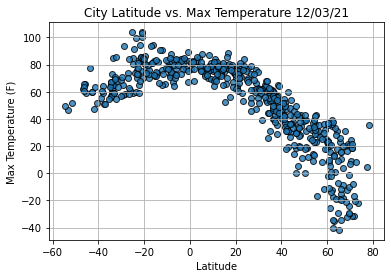

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

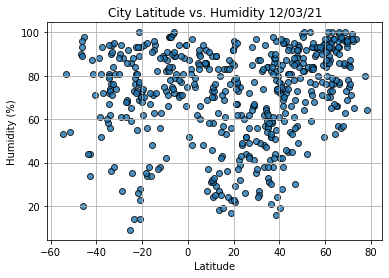

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

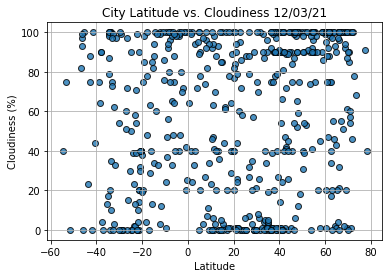

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

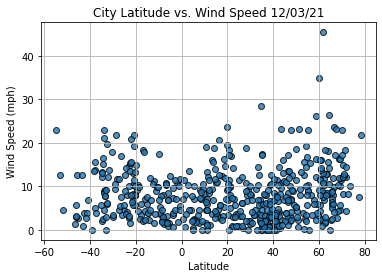

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig5.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                    Ostrovnoy
Country                        RU
Date          2021-12-04 05:31:54
Lat                       68.0531
Lng                       39.5131
Max Temp                    19.72
Humidity                       85
Cloudiness                    100
Wind Speed                   2.64
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hofn,IS,2021-12-04 05:31:48,64.2539,-15.2082,31.14,53,2,8.19
3,Butaritari,KI,2021-12-04 05:31:50,3.0707,172.7902,82.87,75,94,13.44
4,Dikson,RU,2021-12-04 05:26:58,73.5069,80.5464,-22.00,97,68,10.20
5,Albany,US,2021-12-04 05:27:32,42.6001,-73.9662,30.81,74,47,4.21
6,Tura,IN,2021-12-04 05:31:51,25.5198,90.2201,77.23,52,88,3.09


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

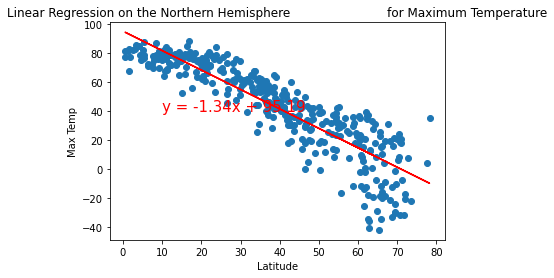

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

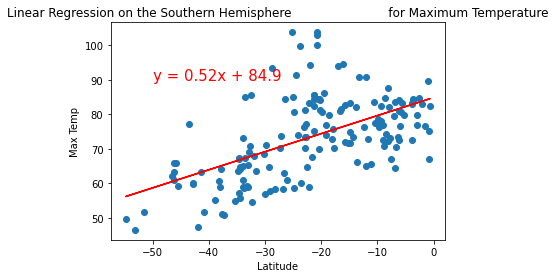

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

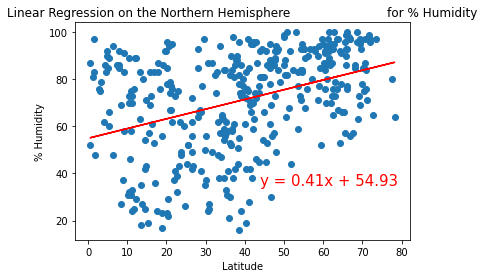

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(44,35))

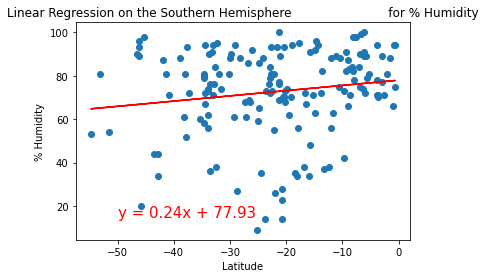

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

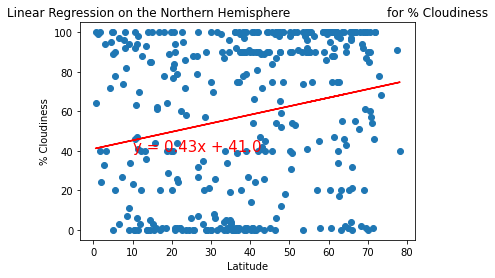

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness', (10,40))

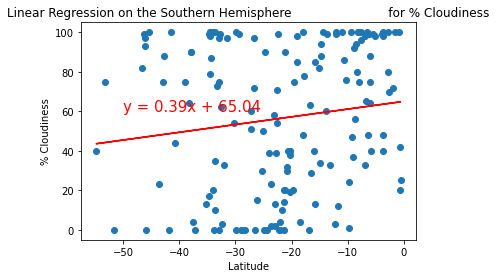

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

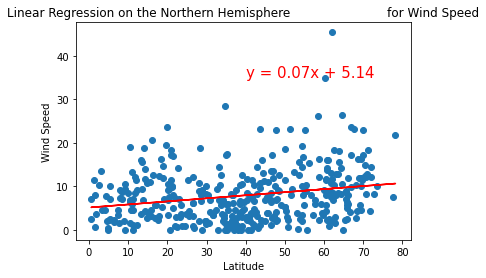

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

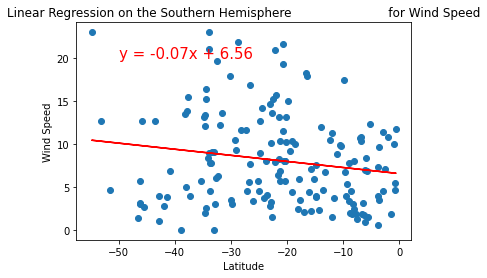

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))